# Lag Plots in Python: Uncovering Time Series Patterns
## What is a Lag Plot?
A lag plot is a scatter plot of a time series against itself shifted by a specified number of time steps (the "lag"). The x-axis shows the value at time t, while the y-axis shows the value at time t+k, where k is the lag.

## Lag plots are powerful diagnostic tools for understanding:

- Autocorrelation: Whether values are correlated with their past values
- Randomness: Whether a series is truly random or has structure
- Patterns: Identifying cyclical behavior, trends, or seasonality
- Data quality: Detecting outliers or anomalies

##  Basic Lag Plot with Pandas
Let's start with a simple example

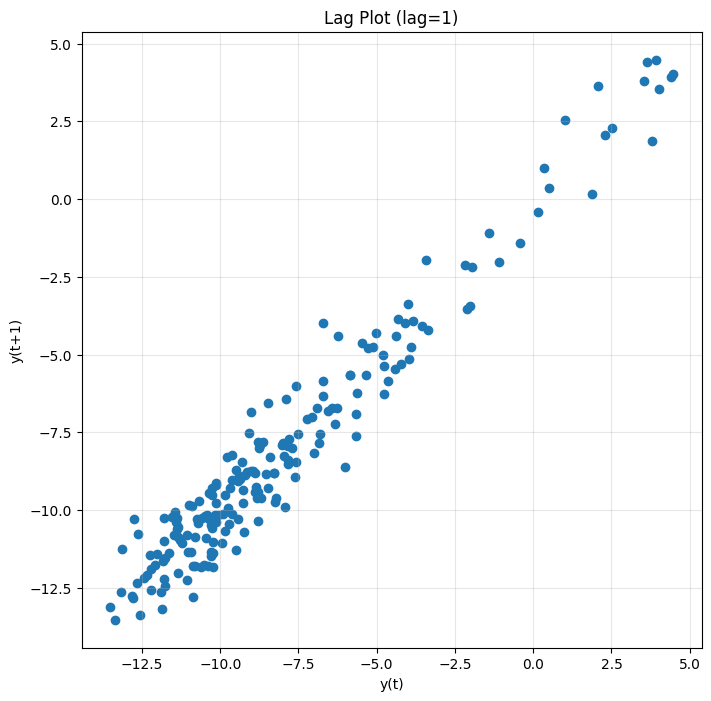

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import lag_plot

# Generate a time series with autocorrelation
np.random.seed(42)
n = 200
t = np.arange(n)
data = np.cumsum(np.random.randn(n))  # Random walk

# Create lag plot
plt.figure(figsize=(8, 8))
lag_plot(pd.Series(data))
plt.title('Lag Plot (lag=1)')
plt.xlabel('y(t)')
plt.ylabel('y(t+1)')
plt.grid(True, alpha=0.3)
plt.show()

# Interpreting Lag Plots
The pattern in a lag plot reveals important characteristics:

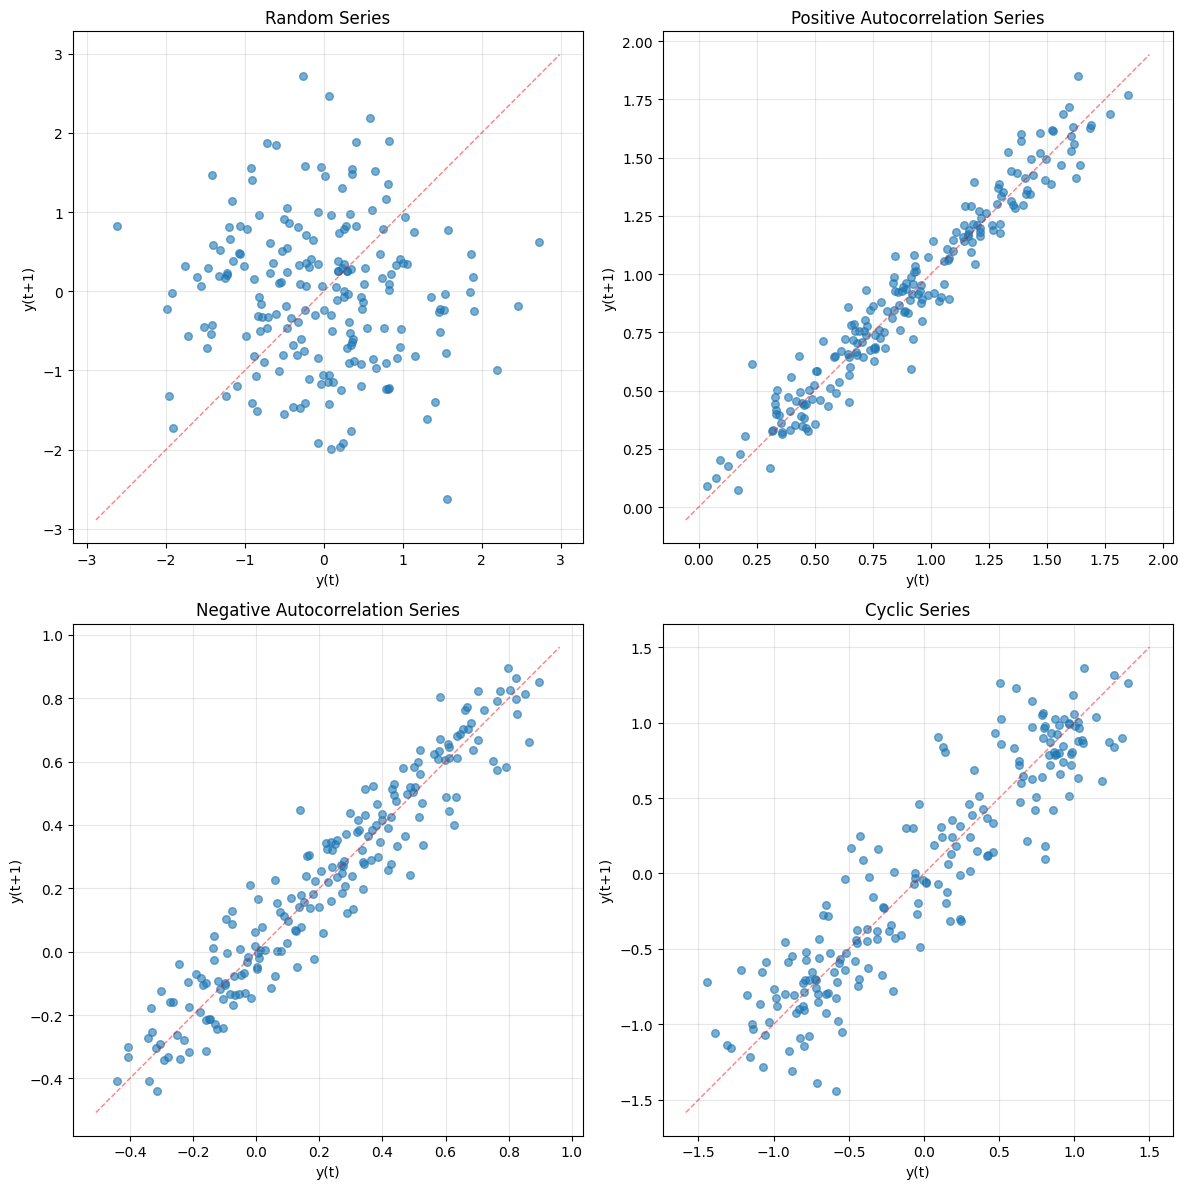

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
n = 200

# Create different time series patterns
patterns = {
    'Random': np.random.randn(n),
    'Positive Autocorrelation': np.cumsum(np.random.randn(n)) * 0.1,
    'Negative Autocorrelation': np.array([(-1)**i * np.random.randn() for i in range(n)]).cumsum() * 0.1,
    'Cyclic': np.sin(np.linspace(0, 4*np.pi, n)) + np.random.randn(n) * 0.2
}

fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.flatten()

for idx, (name, series) in enumerate(patterns.items()):
    ax = axes[idx]
    ax.scatter(series[:-1], series[1:], alpha=0.6, s=30)
    ax.set_xlabel('y(t)')
    ax.set_ylabel('y(t+1)')
    ax.set_title(f'{name} Series')
    ax.grid(True, alpha=0.3)

    # Add diagonal reference line
    lims = [min(ax.get_xlim()[0], ax.get_ylim()[0]),
            max(ax.get_xlim()[1], ax.get_ylim()[1])]
    ax.plot(lims, lims, 'r--', alpha=0.5, linewidth=1)

plt.tight_layout()
plt.show()

# What to look for:

- Random scatter: No autocorrelation, series is random
- Linear positive slope: Strong positive autocorrelation
- Linear negative slope: Strong negative autocorrelation
- Elliptical shape: Moderate autocorrelation
- Curved pattern: Non-linear relationship

# Multiple Lag Plots
Examining multiple lags helps identify patterns at different time scales:


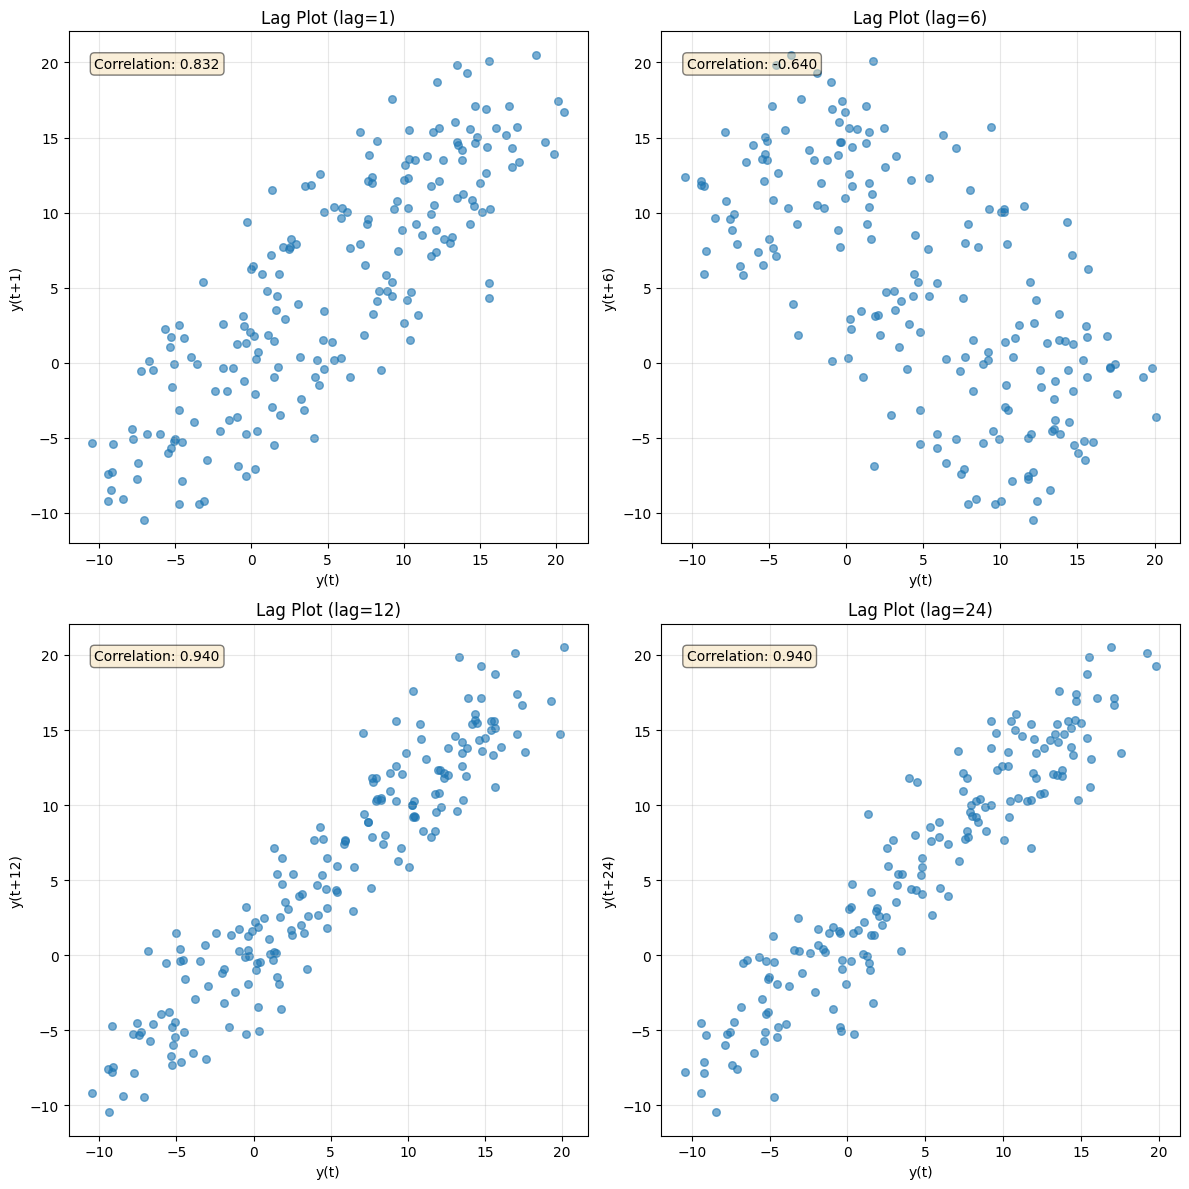

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
import pandas as pd

# Generate seasonal time series
np.random.seed(42)
n = 200
t = np.arange(n)
seasonal = 10 * np.sin(2 * np.pi * t / 12)  # 12-period seasonality
trend = 0.05 * t
noise = np.random.randn(n) * 2
data = seasonal + trend + noise

# Create multiple lag plots
lags = [1, 6, 12, 24]
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.flatten()

for idx, lag in enumerate(lags):
    ax = axes[idx]
    # Manual lag plot for more control
    ax.scatter(data[:-lag], data[lag:], alpha=0.6, s=30)
    ax.set_xlabel(f'y(t)')
    ax.set_ylabel(f'y(t+{lag})')
    ax.set_title(f'Lag Plot (lag={lag})')
    ax.grid(True, alpha=0.3)

    # Calculate correlation
    corr = np.corrcoef(data[:-lag], data[lag:])[0, 1]
    ax.text(0.05, 0.95, f'Correlation: {corr:.3f}',
            transform=ax.transAxes, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

# Lag Plot for Stock Price Data
Real-world example with financial data:

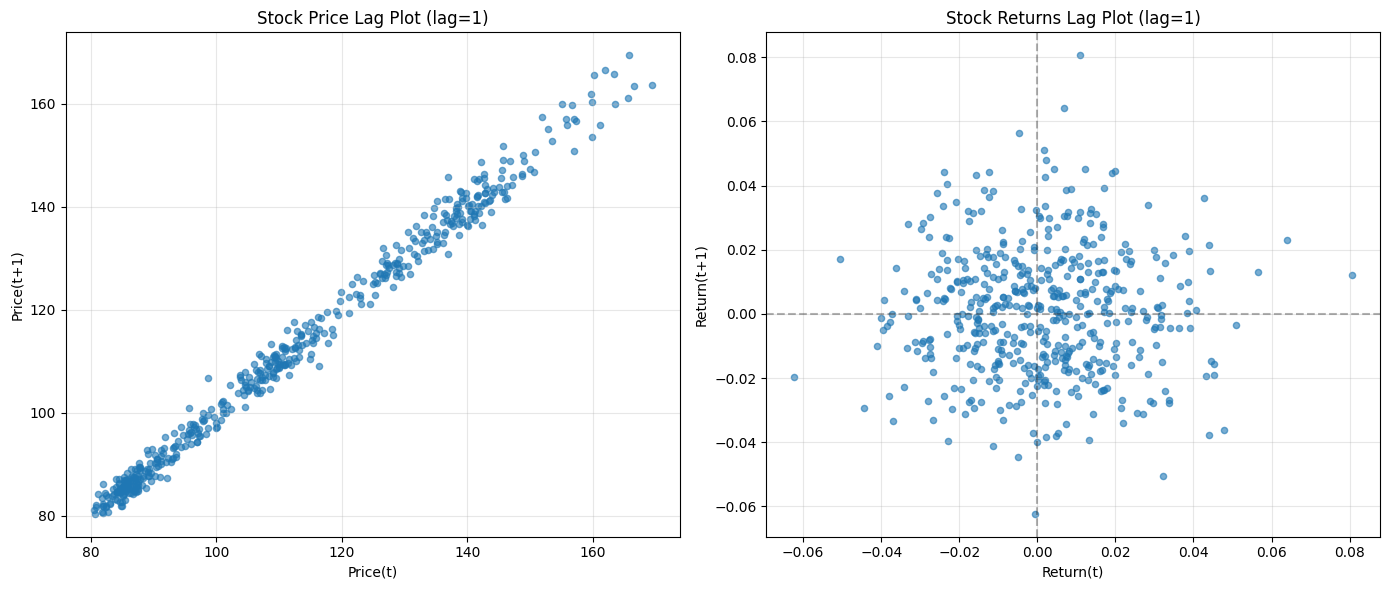

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Simulate stock price data (random walk with drift)
np.random.seed(42)
n = 500
returns = np.random.randn(n) * 0.02 + 0.0005  # Daily returns
prices = 100 * np.exp(np.cumsum(returns))

# Create DataFrame
dates = pd.date_range('2023-01-01', periods=n, freq='D')
df = pd.DataFrame({'Price': prices}, index=dates)

# Lag plots for prices and returns
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Price lag plot
axes[0].scatter(df['Price'][:-1], df['Price'][1:], alpha=0.6, s=20)
axes[0].set_xlabel('Price(t)')
axes[0].set_ylabel('Price(t+1)')
axes[0].set_title('Stock Price Lag Plot (lag=1)')
axes[0].grid(True, alpha=0.3)

# Returns lag plot
returns_series = df['Price'].pct_change().dropna()
axes[1].scatter(returns_series[:-1], returns_series[1:], alpha=0.6, s=20)
axes[1].set_xlabel('Return(t)')
axes[1].set_ylabel('Return(t+1)')
axes[1].set_title('Stock Returns Lag Plot (lag=1)')
axes[1].grid(True, alpha=0.3)
axes[1].axhline(y=0, color='k', linestyle='--', alpha=0.3)
axes[1].axvline(x=0, color='k', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

# Lag Plot Matrix
Visualizing multiple lags simultaneously:

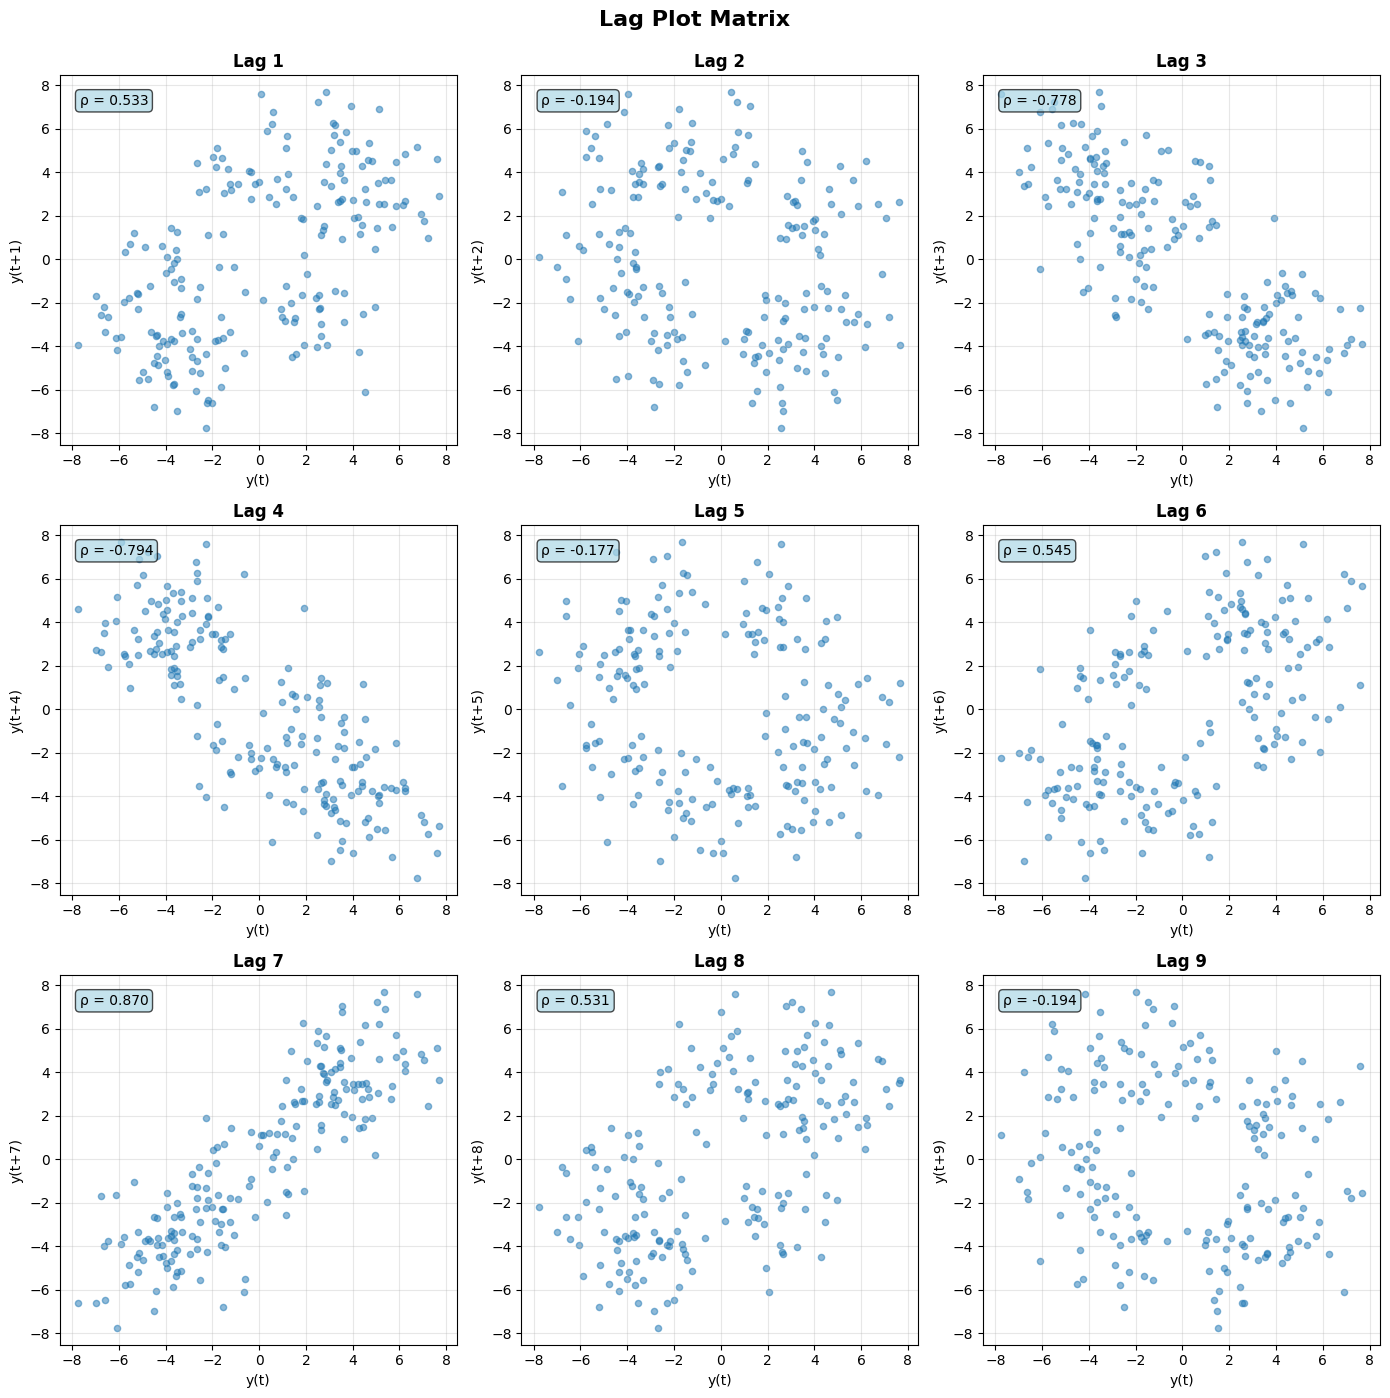

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Generate time series with 7-day cycle
np.random.seed(42)
n = 200
t = np.arange(n)
data = 5 * np.sin(2 * np.pi * t / 7) + np.random.randn(n) * 1.5

# Create lag plot matrix
max_lag = 9
fig, axes = plt.subplots(3, 3, figsize=(14, 14))

for lag in range(1, max_lag + 1):
    row = (lag - 1) // 3
    col = (lag - 1) % 3
    ax = axes[row, col]

    ax.scatter(data[:-lag], data[lag:], alpha=0.5, s=20)
    ax.set_xlabel(f'y(t)', fontsize=10)
    ax.set_ylabel(f'y(t+{lag})', fontsize=10)
    ax.set_title(f'Lag {lag}', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)

    # Calculate and display correlation
    corr = np.corrcoef(data[:-lag], data[lag:])[0, 1]
    ax.text(0.05, 0.95, f'ρ = {corr:.3f}',
            transform=ax.transAxes, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))

plt.suptitle('Lag Plot Matrix', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

# Enhanced Lag Plot with Density
Adding density information to lag plots:

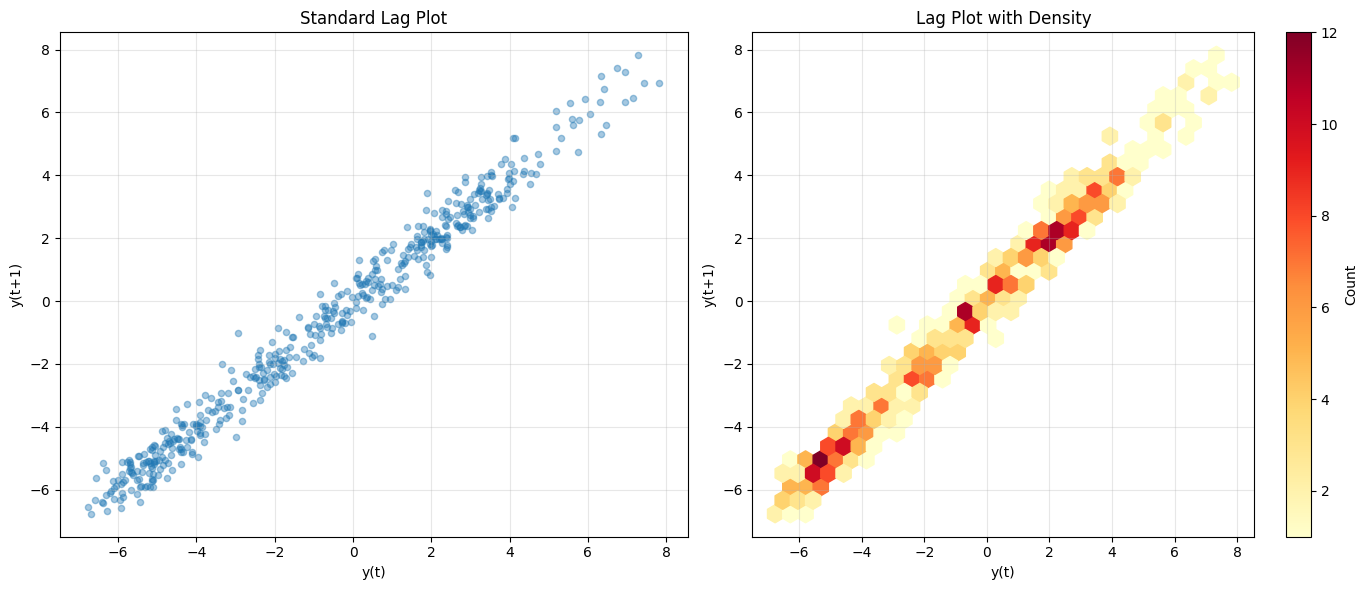

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate time series
np.random.seed(42)
n = 500
data = np.cumsum(np.random.randn(n)) * 0.5

# Create lag plot with density
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Standard scatter plot
axes[0].scatter(data[:-1], data[1:], alpha=0.4, s=20)
axes[0].set_xlabel('y(t)')
axes[0].set_ylabel('y(t+1)')
axes[0].set_title('Standard Lag Plot')
axes[0].grid(True, alpha=0.3)

# Hexbin plot for density
hb = axes[1].hexbin(data[:-1], data[1:], gridsize=30, cmap='YlOrRd', mincnt=1)
axes[1].set_xlabel('y(t)')
axes[1].set_ylabel('y(t+1)')
axes[1].set_title('Lag Plot with Density')
axes[1].grid(True, alpha=0.3)
plt.colorbar(hb, ax=axes[1], label='Count')

plt.tight_layout()
plt.show()

# Seasonal Lag Plots
Identifying seasonal patterns:

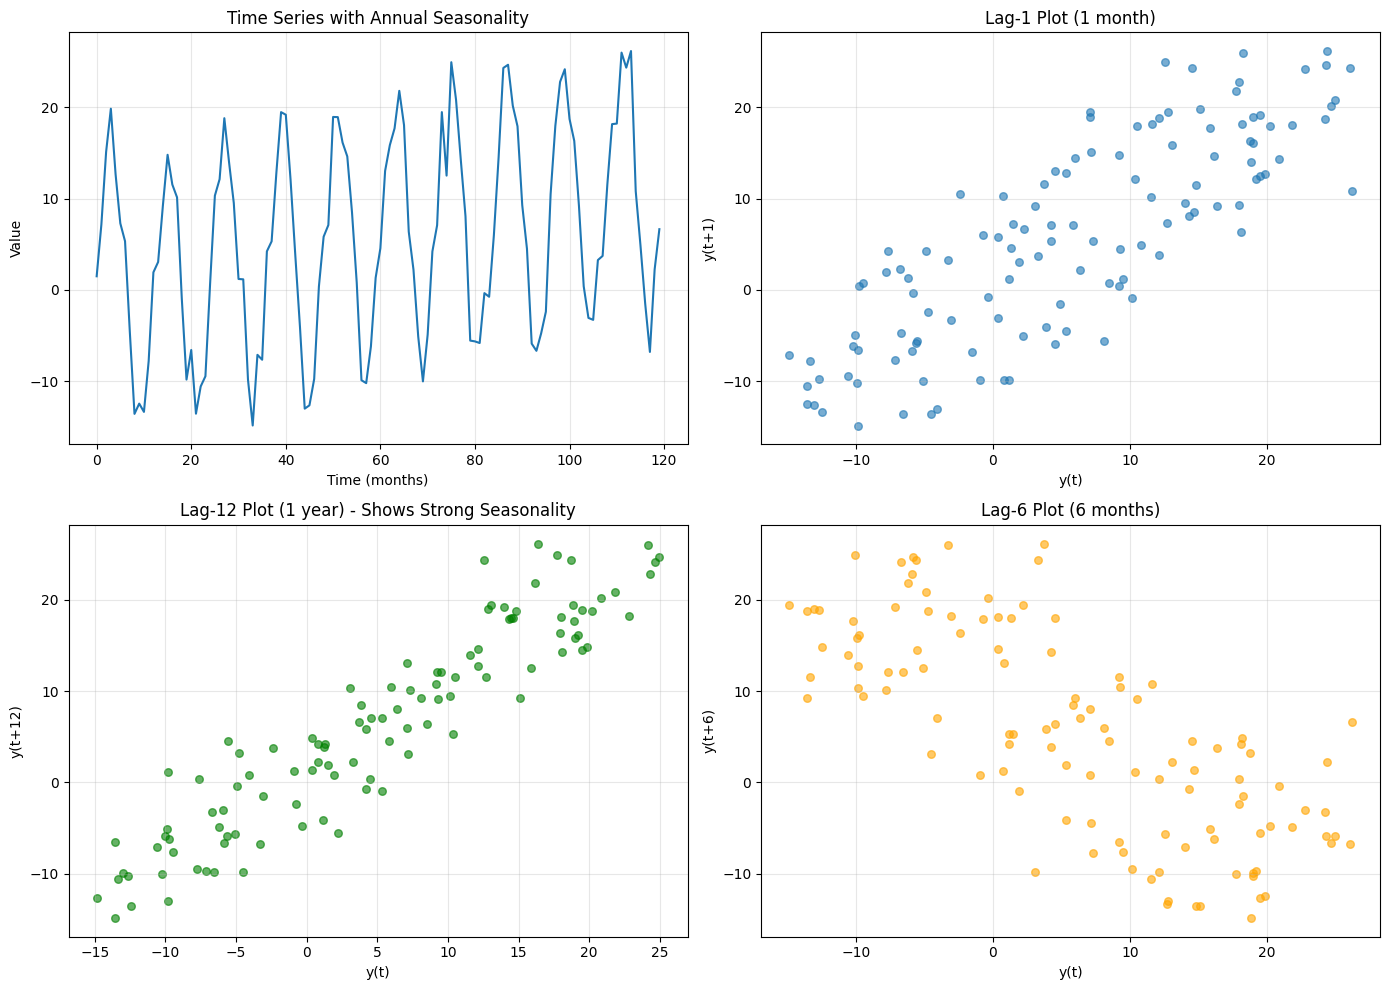

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Generate monthly data with yearly seasonality
np.random.seed(42)
n = 120  # 10 years of monthly data
t = np.arange(n)
seasonal = 15 * np.sin(2 * np.pi * t / 12)  # Annual cycle
trend = 0.1 * t
noise = np.random.randn(n) * 3
data = seasonal + trend + noise

# Plot time series and seasonal lag
fig = plt.figure(figsize=(14, 10))

# Time series
ax1 = plt.subplot(2, 2, 1)
ax1.plot(data, linewidth=1.5)
ax1.set_xlabel('Time (months)')
ax1.set_ylabel('Value')
ax1.set_title('Time Series with Annual Seasonality')
ax1.grid(True, alpha=0.3)

# Lag-1 (month-to-month)
ax2 = plt.subplot(2, 2, 2)
ax2.scatter(data[:-1], data[1:], alpha=0.6, s=30)
ax2.set_xlabel('y(t)')
ax2.set_ylabel('y(t+1)')
ax2.set_title('Lag-1 Plot (1 month)')
ax2.grid(True, alpha=0.3)

# Lag-12 (year-to-year)
ax3 = plt.subplot(2, 2, 3)
ax3.scatter(data[:-12], data[12:], alpha=0.6, s=30, c='green')
ax3.set_xlabel('y(t)')
ax3.set_ylabel('y(t+12)')
ax3.set_title('Lag-12 Plot (1 year) - Shows Strong Seasonality')
ax3.grid(True, alpha=0.3)

# Lag-6 (half-year)
ax4 = plt.subplot(2, 2, 4)
ax4.scatter(data[:-6], data[6:], alpha=0.6, s=30, c='orange')
ax4.set_xlabel('y(t)')
ax4.set_ylabel('y(t+6)')
ax4.set_title('Lag-6 Plot (6 months)')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Comparing Original Series with Differenced Series
Lag plots can show the effect of differencing:


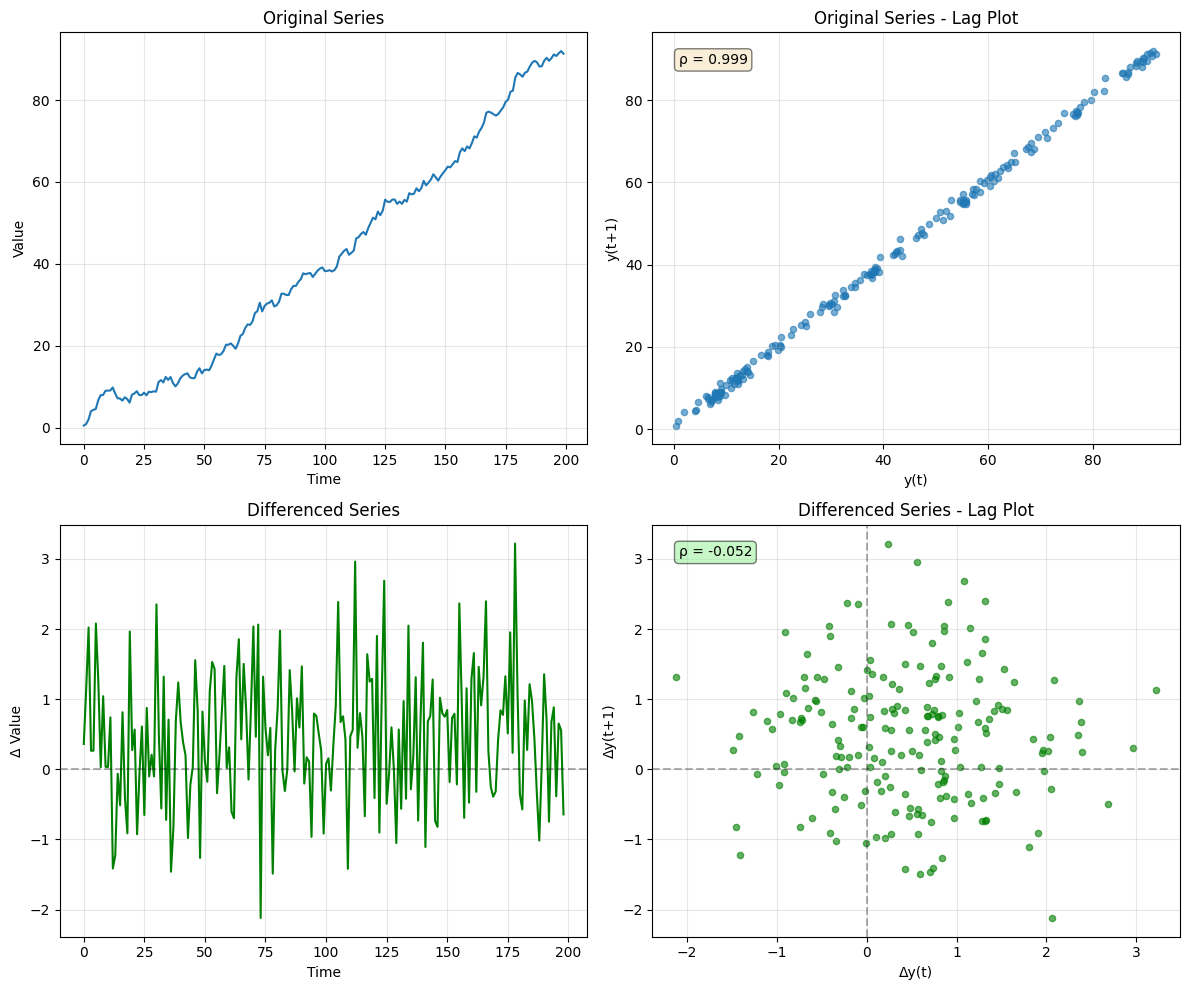

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Generate non-stationary time series (trend + noise)
np.random.seed(42)
n = 200
t = np.arange(n)
data = 0.5 * t + np.cumsum(np.random.randn(n))

# First difference
data_diff = np.diff(data)

# Create comparison plot
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Original time series
axes[0, 0].plot(data, linewidth=1.5)
axes[0, 0].set_title('Original Series')
axes[0, 0].set_xlabel('Time')
axes[0, 0].set_ylabel('Value')
axes[0, 0].grid(True, alpha=0.3)

# Original lag plot
axes[0, 1].scatter(data[:-1], data[1:], alpha=0.6, s=20)
axes[0, 1].set_title('Original Series - Lag Plot')
axes[0, 1].set_xlabel('y(t)')
axes[0, 1].set_ylabel('y(t+1)')
axes[0, 1].grid(True, alpha=0.3)
corr_orig = np.corrcoef(data[:-1], data[1:])[0, 1]
axes[0, 1].text(0.05, 0.95, f'ρ = {corr_orig:.3f}',
                transform=axes[0, 1].transAxes, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Differenced time series
axes[1, 0].plot(data_diff, linewidth=1.5, color='green')
axes[1, 0].set_title('Differenced Series')
axes[1, 0].set_xlabel('Time')
axes[1, 0].set_ylabel('Δ Value')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].axhline(y=0, color='k', linestyle='--', alpha=0.3)

# Differenced lag plot
axes[1, 1].scatter(data_diff[:-1], data_diff[1:], alpha=0.6, s=20, color='green')
axes[1, 1].set_title('Differenced Series - Lag Plot')
axes[1, 1].set_xlabel('Δy(t)')
axes[1, 1].set_ylabel('Δy(t+1)')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].axhline(y=0, color='k', linestyle='--', alpha=0.3)
axes[1, 1].axvline(x=0, color='k', linestyle='--', alpha=0.3)
corr_diff = np.corrcoef(data_diff[:-1], data_diff[1:])[0, 1]
axes[1, 1].text(0.05, 0.95, f'ρ = {corr_diff:.3f}',
                transform=axes[1, 1].transAxes, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))

plt.tight_layout()
plt.show()

# Practical Applications
1. Model Validation
After fitting a time series model, lag plots of residuals should show no pattern (random scatter), indicating the model captured all structure.
2. Forecasting Feasibility
Strong patterns in lag plots suggest predictability. Random scatter suggests the series is difficult to forecast.
3. Seasonality Detection
High correlation at seasonal lags (e.g., lag-12 for monthly data with annual seasonality) confirms seasonal patterns.
4. Data Quality Checks
Unusual patterns or outliers in lag plots can reveal data entry errors or anomalies.
5. Stationarity Assessment
Non-random patterns suggest non-stationarity, indicating the need for differencing or transformation.

# Tips for Effective Lag Plot Analysis

- Check multiple lags: Don't just look at lag-1; examine lags that match suspected cycles
- Compare with ACF: Use lag plots alongside autocorrelation function plots for complete picture
- Consider transformations: If patterns are unclear, try log transformation or differencing
- Use color coding: For long series, color by time to see if relationships change
- Calculate correlations: Always quantify the visual patterns with correlation coefficients
- Test for significance: Use statistical tests to confirm visual patterns aren't random

# Lag Plot vs ACF
While both examine autocorrelation, they serve different purposes:

# Lag Plots:

- Show the actual relationship between values
- Reveal non-linear patterns
- Good for identifying outliers
- Visual, intuitive interpretation

# ACF (Autocorrelation Function):

- Quantifies correlation at all lags
- Tests statistical significance
- More compact representation
- Better for identifying lag structure

Use both together for comprehensive time series analysis!